In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_ds="/kaggle/input/traffic-net/trafficnet_dataset_v1/train"
test_ds="/kaggle/input/traffic-net/trafficnet_dataset_v1/test"

# Data preprocessing
****

In [3]:
root_path = "/kaggle/input/traffic-net/trafficnet_dataset_v1/train/"
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(root_path + name)) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 4 
Class Names : ['accident', 'dense_traffic', 'fire', 'sparse_traffic']
female : 900 
male : 900


In [4]:
os.listdir('/kaggle/input/traffic-net/trafficnet_dataset_v1/train')

['fire', 'sparse_traffic', 'accident', 'dense_traffic']

In [5]:
import plotly.express as px

In [6]:
fig = px.pie(names=class_names, values=class_dis,
             title="Training Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [7]:
valid_path = "/kaggle/input/traffic-net/trafficnet_dataset_v1/test/"
valid_dis = [len(os.listdir(valid_path + name)) for name in class_names]
fig = px.pie(names=class_names, values=valid_dis,
             title="test Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 
                                
test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [11]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Found 3600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [12]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [13]:
img= train_generator[0]
print(img)

(array([[[[139.85959  , 157.85959  , 169.85959  ],
         [176.99461  , 194.99461  , 206.99461  ],
         [176.06071  , 194.06071  , 206.06071  ],
         ...,
         [184.       , 199.       , 206.       ],
         [184.       , 199.       , 206.       ],
         [184.       , 199.       , 206.       ]],

        [[157.83539  , 175.83539  , 187.83539  ],
         [175.00963  , 193.00963  , 205.00963  ],
         [158.21646  , 176.21646  , 188.21646  ],
         ...,
         [186.51582  , 200.25792  , 207.88687  ],
         [186.51582  , 200.25792  , 207.88687  ],
         [186.51582  , 200.25792  , 207.88687  ]],

        [[156.4359   , 174.4359   , 186.4359   ],
         [145.2416   , 163.2416   , 175.2416   ],
         [138.01941  , 156.01941  , 168.01941  ],
         ...,
         [151.97047  , 164.97047  , 172.97047  ],
         [151.97047  , 164.97047  , 172.97047  ],
         [151.97047  , 164.97047  , 172.97047  ]],

        ...,

        [[ 14.       ,  17.       ,  

In [14]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [15]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 4)


In [16]:
print(len(train_generator))
print(len(test_ds))

113
52


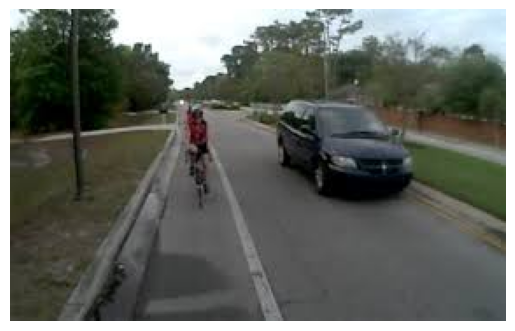

In [19]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/traffic-net/trafficnet_dataset_v1/train/sparse_traffic/images_218.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd


# Build Sequential model

In [21]:
# Build the Sequential feedforward neural network model

seq_model = Sequential([ 
    Flatten(input_shape=(224,224,3), name='input_layer'),
      Dense(128, activation='relu', name='layer1'),
    Dense(64, activation='relu', name='layer2'),
    # Dense(64, activation='relu', name='layer2'),
    Dense(32, activation='relu', name='layer3'),
    # Dense(32, activation='relu', name='layer4'),
    Dense(4, activation='softmax', name='output_layer')
])
       

In [22]:
# Print the model summary

seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 150528)            0         
                                                                 
 layer1 (Dense)              (None, 128)               19267712  
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 4)                 132       
                                                                 
Total params: 19,278,180
Trainable params: 19,278,180
Non-trainable params: 0
_________________________________________________________________


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
seq_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [31]:
history =seq_model.fit(train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20
113/113 [==============================] - 43s 380ms/step - loss: 41.6373 - accuracy: 0.3828 - val_loss: 24.1070 - val_accuracy: 0.4263
Epoch 2/20
113/113 [==============================] - 43s 382ms/step - loss: 28.4797 - accuracy: 0.4122 - val_loss: 39.6116 - val_accuracy: 0.3050
Epoch 3/20
113/113 [==============================] - 43s 380ms/step - loss: 34.0821 - accuracy: 0.3928 - val_loss: 95.5279 - val_accuracy: 0.2537
Epoch 4/20
113/113 [==============================] - 43s 381ms/step - loss: 36.1171 - accuracy: 0.3986 - val_loss: 20.1780 - val_accuracy: 0.4338
Epoch 5/20
113/113 [==============================] - 43s 382ms/step - loss: 34.2458 - accuracy: 0.3839 - val_loss: 27.6676 - val_accuracy: 0.4288
Epoch 6/20
113/113 [==============================] - 44s 388ms/step - loss: 31.4604 - accuracy: 0.4058 - val_loss: 18.4353 - val_accuracy: 0.4125
Epoch 7/20
113/113 [==============================] - 44s 386ms/step - loss: 32.2189 - accuracy: 0.3894 - val_loss: 17

In [32]:
n_categories = len(os.listdir('/kaggle/input/traffic-net/trafficnet_dataset_v1/test'))# number of categories print(n_categories)

In [33]:
n_categories

4

In [34]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,41.637287,0.382778,24.107012,0.42625
1,28.479713,0.412222,39.611595,0.30500
2,34.082123,0.392778,95.527939,0.25375
3,36.117088,0.398611,20.177954,0.43375
4,34.245770,0.383889,27.667561,0.42875


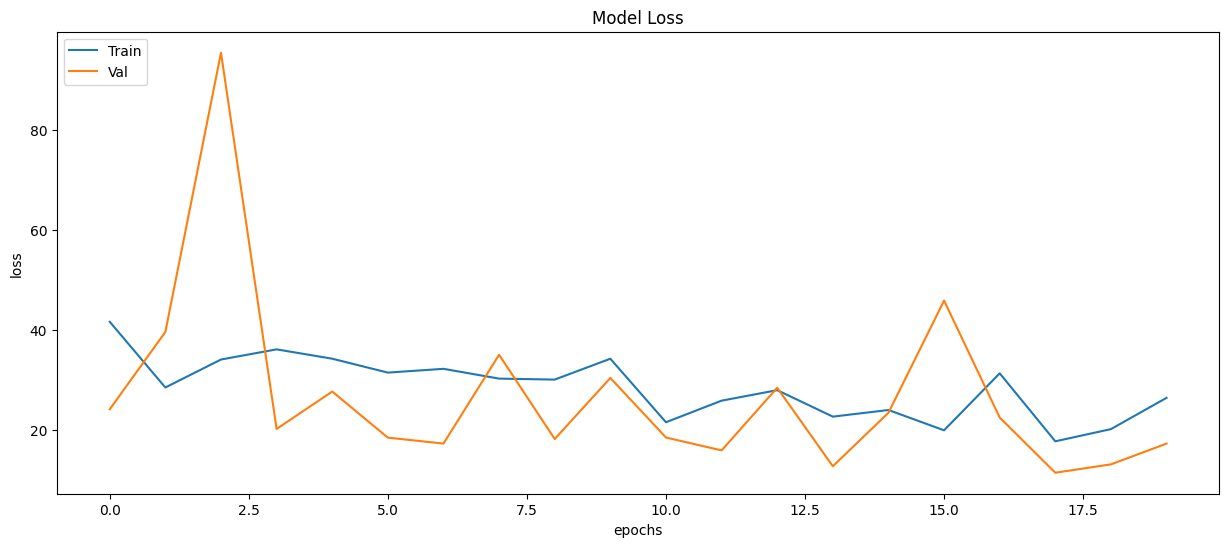

In [35]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

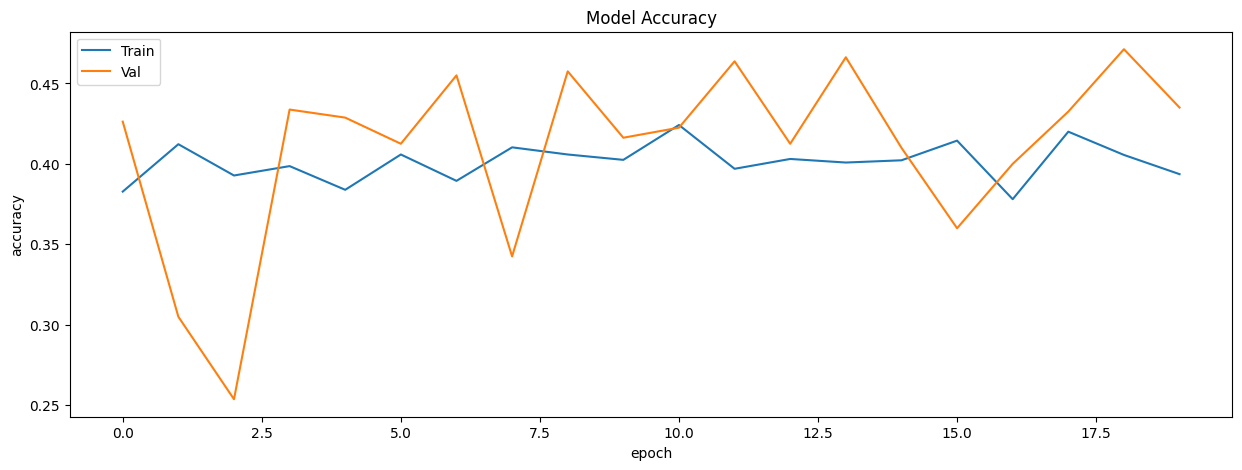

In [36]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [37]:
y_test_1 = test_generator.classes
y_pred_1 =seq_model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

25/25 [==============================] - 2s 63ms/step


In [38]:
results =seq_model.evaluate(test_generator)

25/25 [==============================] - 2s 63ms/step - loss: 17.2460 - accuracy: 0.4350


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.74      0.07      0.13       200
           1       0.38      0.47      0.42       200
           2       0.77      0.48      0.59       200
           3       0.35      0.71      0.47       200

    accuracy                           0.43       800
   macro avg       0.56      0.43      0.40       800
weighted avg       0.56      0.43      0.40       800



7/7 [==============================] - 0s 13ms/step


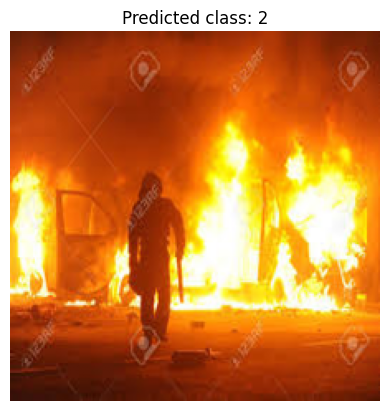

In [41]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/traffic-net/trafficnet_dataset_v1/test/fire'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions =seq_model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [42]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : fire
Class probability: 0.30892804
Predicted class for 2.jpg : dense_traffic
Class probability: 0.2812145
Predicted class for 3.jpg : sparse_traffic
Class probability: 0.2697688
Predicted class for 4.jpg : dense_traffic
Class probability: 0.2955102
Predicted class for 5.jpg : fire
Class probability: 0.29370275
Predicted class for 6.jpg : dense_traffic
Class probability: 0.2733659
Predicted class for 7.jpg : sparse_traffic
Class probability: 0.31086144
Predicted class for 8.jpg : fire
Class probability: 0.2850844
Predicted class for 9.jpg : fire
Class probability: 0.31997788
Predicted class for 10.jpg : fire
Class probability: 0.26328725
Predicted class for 11.jpg : fire
Class probability: 0.28628588
Predicted class for 12.jpg : dense_traffic
Class probability: 0.3055618
Predicted class for 13.jpg : dense_traffic
Class probability: 0.27827916
Predicted class for 14.jpg : fire
Class probability: 0.2689699
Predicted class for 15.jpg : dense_traffic
Class probab